In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
sns.set()

df = pd.read_csv('desktop/data/sleephealth.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


[Text(0.5, 0, 'Sleep quality'), Text(0, 0.5, 'Physical activity (minutes)')]

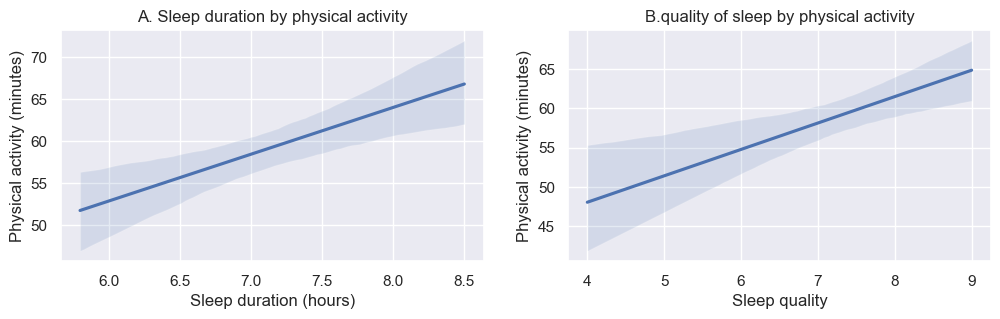

In [5]:
fig,axs = plt.subplots(1,2, figsize=(12,3))

sns.regplot(data=df ,y="Physical Activity Level",x="Sleep Duration", scatter=False,
            ax=axs[0]).set_title("A. Sleep duration by physical activity")
axs[0].set(xlabel= "Sleep duration (hours)", ylabel= "Physical activity (minutes)")

sns.regplot(data=df,y = "Physical Activity Level",x="Quality of Sleep", scatter=False, 
            ax=axs[1]).set_title("B.quality of sleep by physical activity")
axs[1].set(xlabel="Sleep quality",ylabel="Physical activity (minutes)")


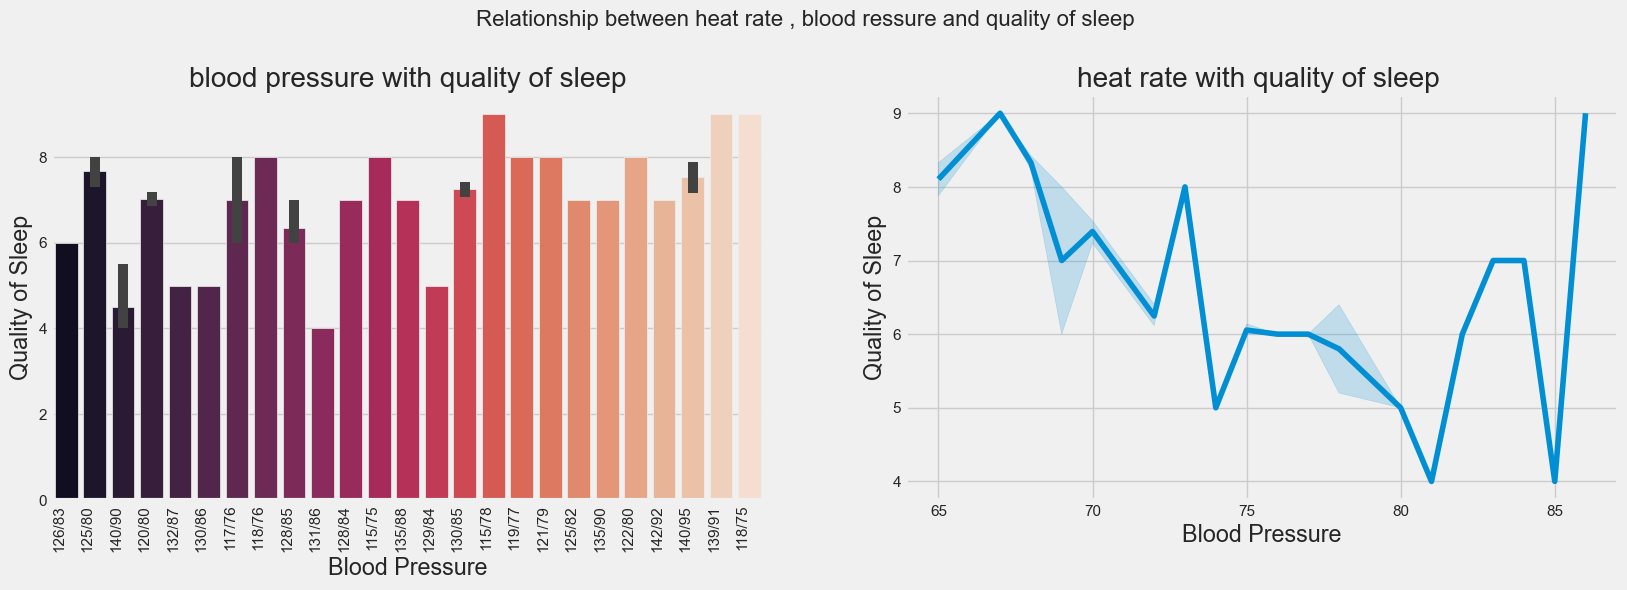

In [6]:
with plt.style.context('fivethirtyeight'):
#sns.set_palette ("hls")
    fig, ax =plt.subplots(1,2, figsize=(18,5))

    sns.barplot(x= "Blood Pressure",
                y= 'Quality of Sleep',
                data = df,
                palette= "rocket",
                ax=ax[0]).set_title("blood pressure with quality of sleep")
    ax[0].set_xlabel('Blood Pressure')
    
    sns.lineplot(x="Heart Rate",
                 y="Quality of Sleep",
                 data=df,
                 ax=ax[1]).set_title("heat rate with quality of sleep ")
    ax[1].set_xlabel('Blood Pressure')

fig. suptitle("Relationship between heat rate , blood ressure and quality of sleep ", y= 1.05, fontsize = 16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
plt.show()

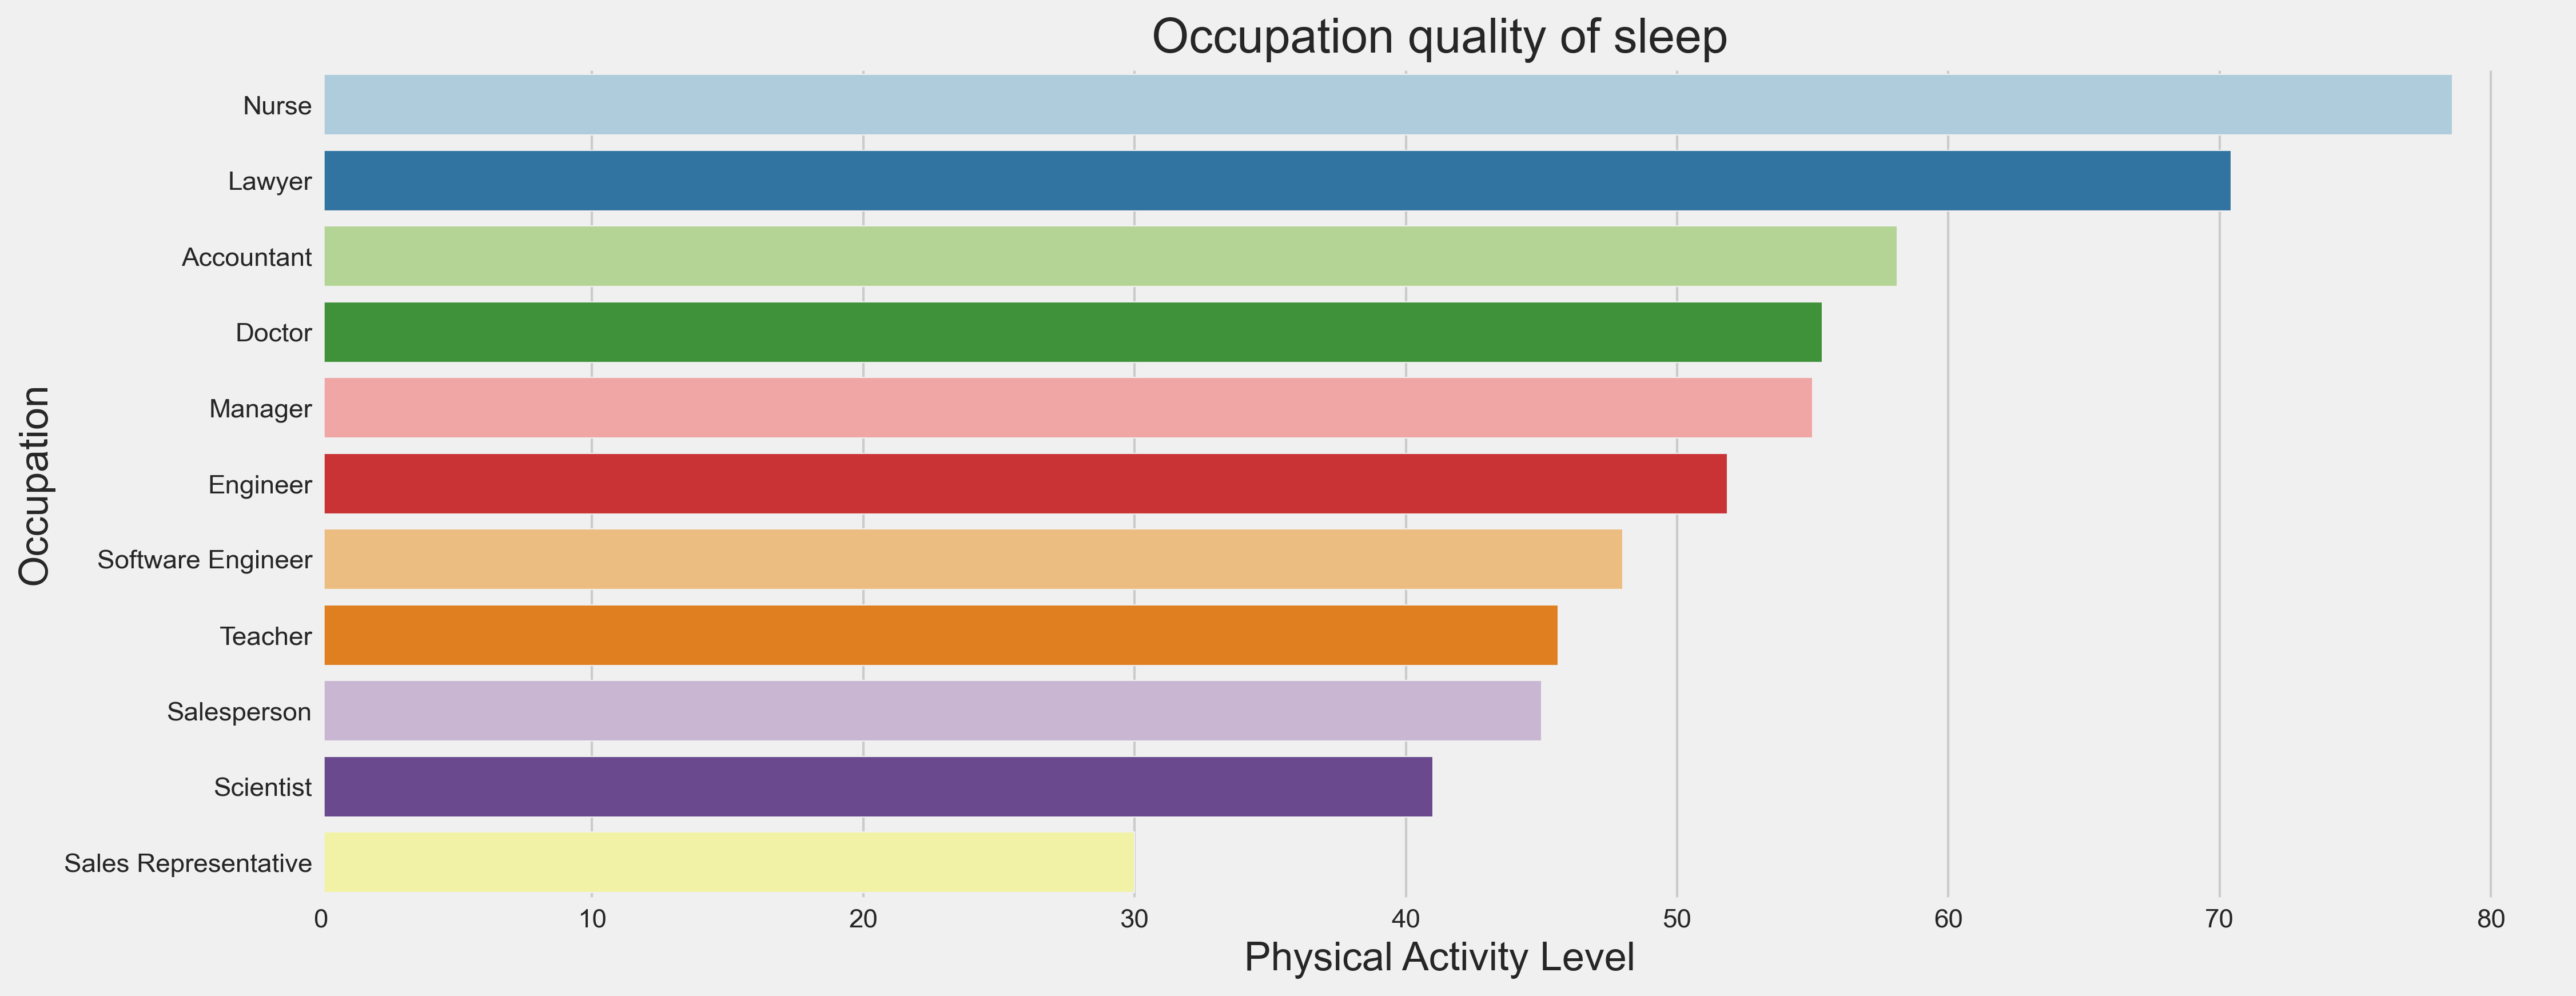

In [7]:
q_O = df.groupby('Occupation')['Physical Activity Level'].mean().sort_values( ascending = False)
q_O= q_O.reset_index()


with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")

    plt.figure(figsize=(15, 6), dpi=300)
    
    sns.barplot(y= 'Occupation',
                x="Physical Activity Level",
                data= q_O )
    plt.title("Occupation quality of sleep")
    plt.show()
    

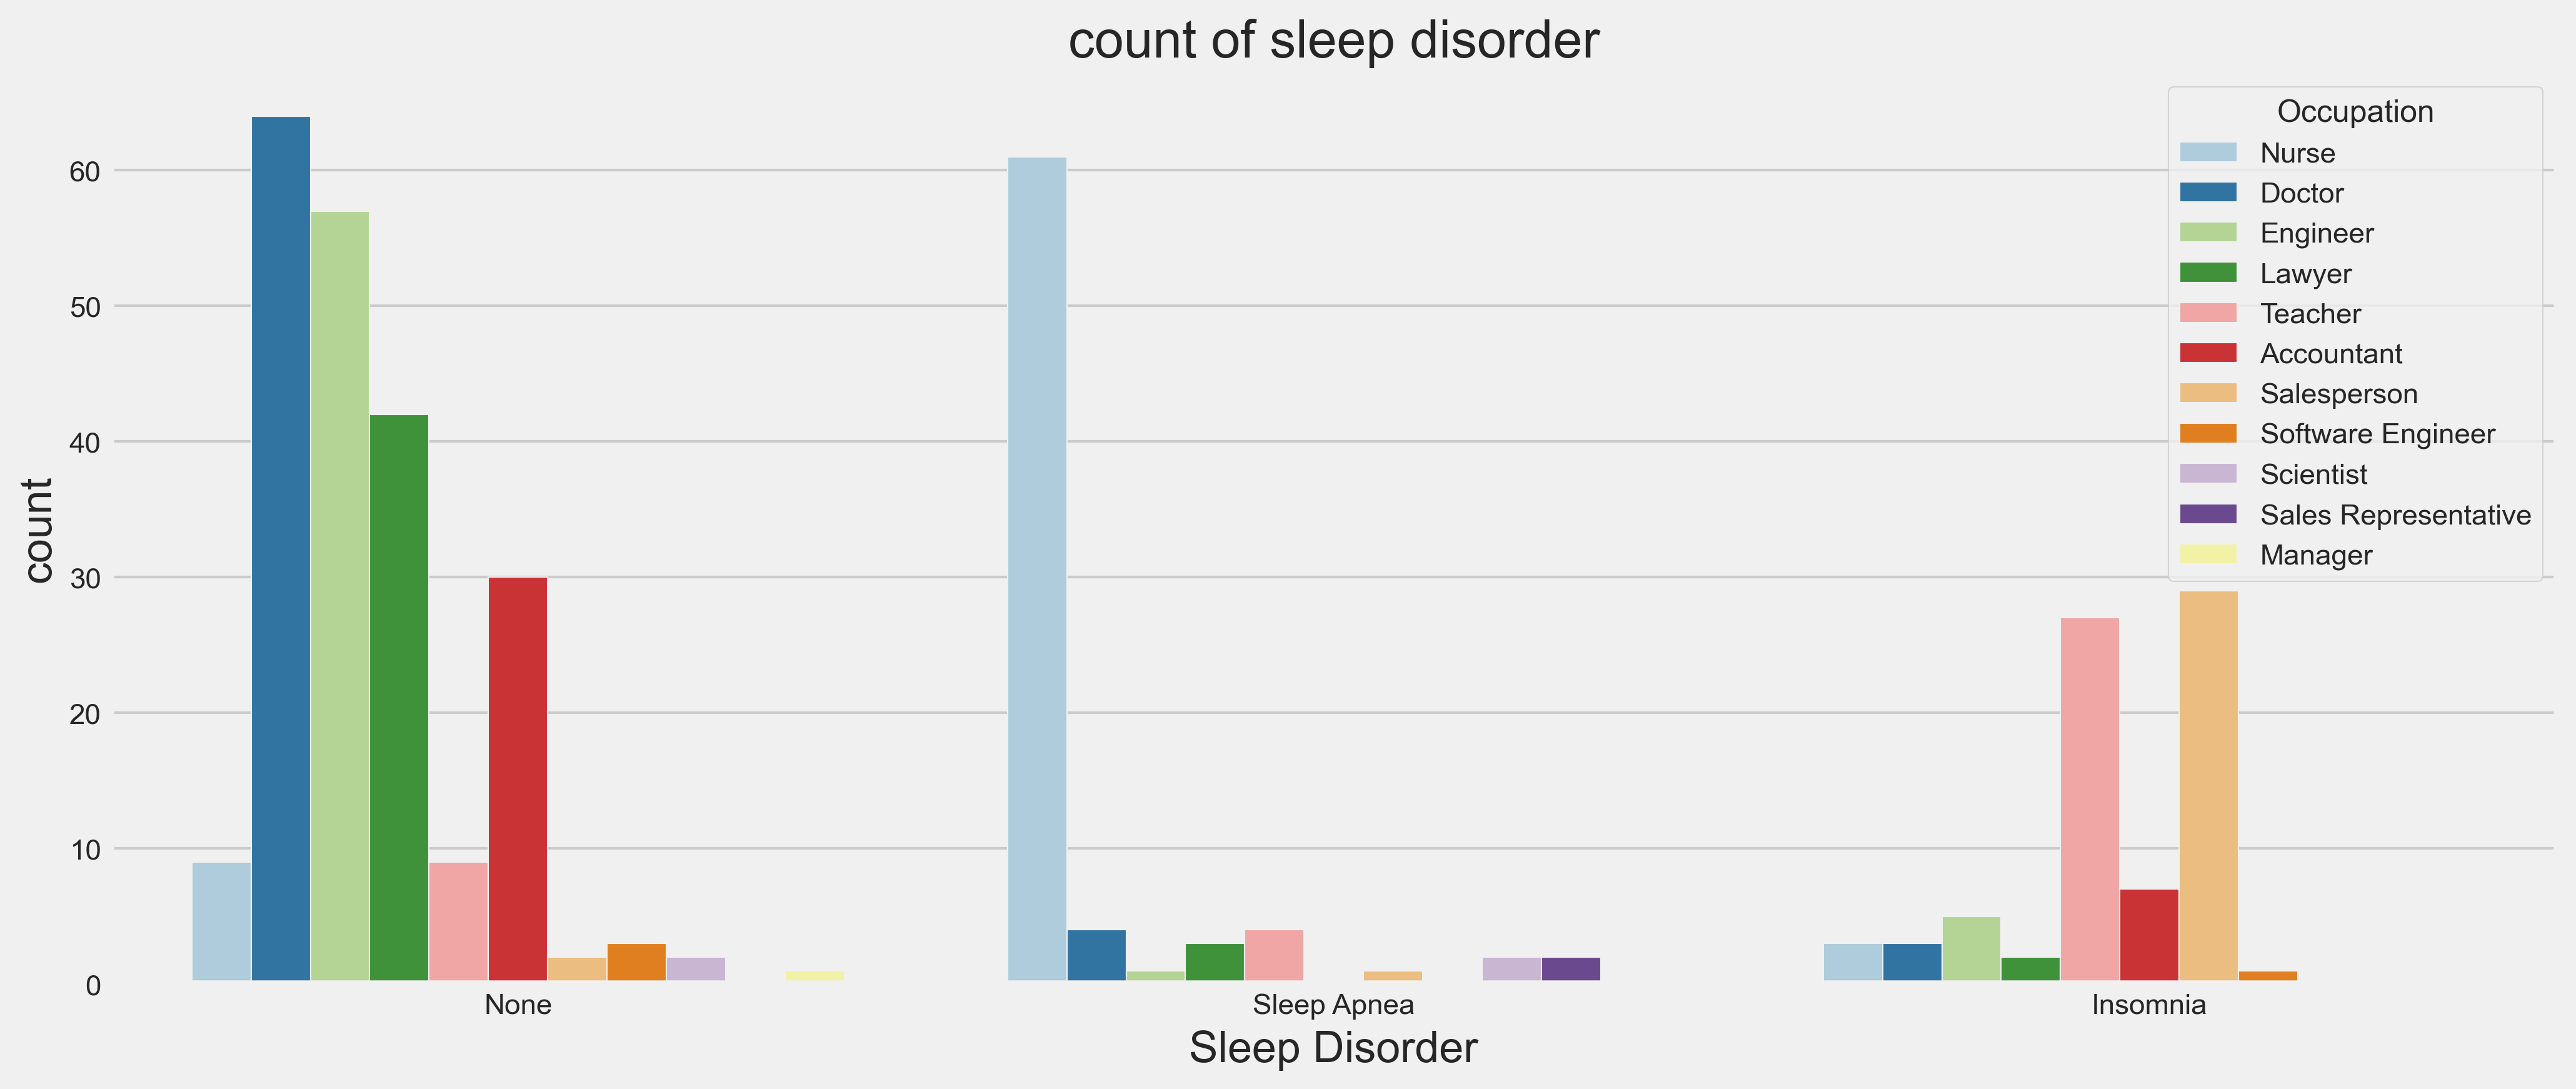

In [11]:
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x= 'Sleep Disorder', 
                  hue="Occupation",
                  hue_order=df["Occupation"].value_counts().index, 
                  data=df,
                 palette = "Paired")
    plt.title("count of sleep disorder")
    plt.show()